In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


![](https://st1.thehealthsite.com/wp-content/uploads/2020/11/Diabetes-2-768x427.jpg)

<p style="background-color:Tomato;">Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.</p>

features: 

Pregnancies:  Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

<p style="background-color:Tomato;">importing essential libraries</p>


In [2]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")

In [3]:
import plotly.graph_objects as go

<p style="background-color:Tomato;">importing dataset</p>


In [4]:
df= pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<p style="background-color:Tomato;">No missing values present in the dataset</p>


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<p style="background-color:Tomato;">However the dataset shows some of the features having minimum value as 0 like insulin,BMI,glucose which is not logical and can be considered missing values</p>


In [9]:
print(f"the missing values for glucose are : ",len(df.loc[df.Glucose==0]))
print(f"the missing values for insulin are : ",len(df.loc[df.Insulin==0]))
print(f"the missing values for bloodpressure are : ",len(df.loc[df.BloodPressure==0]))
print(f"the missing values for SkinThickness are : ",len(df.loc[df.SkinThickness==0]))
print(f"the missing values for BMI are : ",len(df.loc[df.BMI==0]))


the missing values for glucose are :  5
the missing values for insulin are :  374
the missing values for bloodpressure are :  35
the missing values for SkinThickness are :  227
the missing values for BMI are :  11


<p style="background-color:Tomato;">we will be imputing these missing values with the mean with help of sklearn imputer</p>




In [10]:
from sklearn.impute import SimpleImputer

In [11]:
impute= SimpleImputer(missing_values=0, strategy="mean")

In [12]:
df.iloc[:,1:6]= impute.fit_transform(df.iloc[:,1:6])

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<p style="background-color:Tomato;">All the zero values have been imputed</p>


# **<h2 style="background-color:DodgerBlue;">EDA</h2>**

<p style="background-color:Tomato;">CORRELATION HEATMAP SEABORN</p>


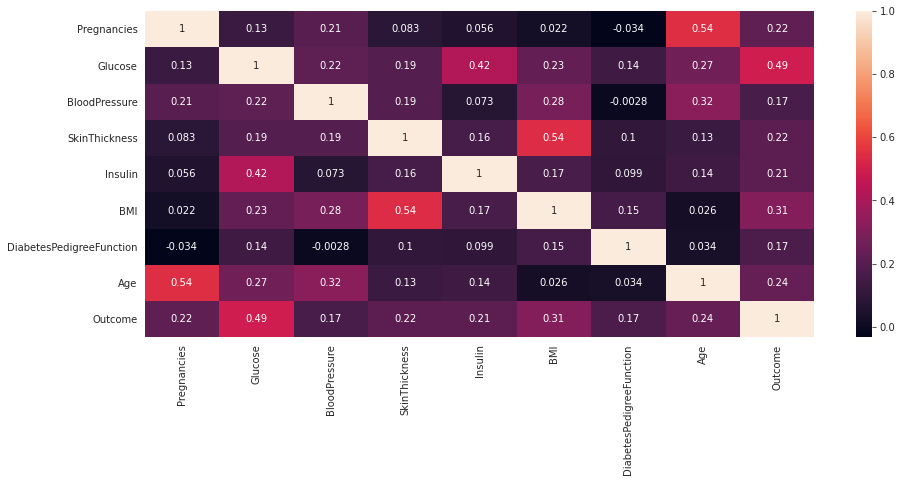

In [14]:
plt.figure(figsize= (15,6))
sns.set_style("darkgrid")
sns.heatmap(df.corr(),annot= True)
plt.show()

<p style="background-color:Tomato;">lets see the distribution of age across dataset</p>


In [15]:
ax= px.histogram(df,x= "Age", template= "plotly_dark",color= "Outcome",title='Age distribution')
ax.show()

<p style="background-color:Tomato;">lets see the distribution of Outcome(diabetes or not)</p>

In [16]:
ax= px.pie(df, names= "Outcome",template= "plotly_dark",title= "chances of Diabetes",hole= 0.5)
ax.show()

The dataset is slightly imbalanced wrt to outcome as 65% of patients have low of diabetes and only 34% patients have high chance

<p style="background-color:Tomato;">Glucose and age correlation/ distribution across target variable</p>

In [17]:
ax= px.scatter(df,x= "Glucose",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="age and glucose correlation")
ax.show()

<p style="background-color:Tomato;">blood pressure and age correlation/ distribution across target variable</p>

In [18]:
ax= px.scatter(df,x= "BloodPressure",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="age and bloodpressure correlation")
ax.show()

<p style="background-color:Tomato;">Insulin and age correlation/ distribution across target variable</p>

In [19]:
ax= px.scatter(df,x= "Insulin",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="age and Insulin correlation")
ax.show()

<p style="background-color:Tomato;">3D scatterplot showing correlation between insulin and glucose across ages and it impacts the target variable</p>

In [20]:
ax = px.scatter_3d(df, x="Age", y="Glucose", z="Insulin",template= "plotly_dark",color="Outcome")
ax.show()

<p style="background-color:Tomato;">Visualizing the BMI and diabetes pedigree function</p>

In [21]:
dt= df.iloc[:,6:]

In [22]:
ax= px.parallel_coordinates(dt, color="Outcome",template= "plotly_dark")
ax.show()

In [23]:
fig = px.area(df, x="Age", y="BMI", color="Outcome",template= "plotly_dark")
fig.show()

In [24]:
dt= df.iloc[:,1:8]

In [25]:
ax = px.box(dt,template= "plotly_dark")
ax.show()


# **<h2 style="background-color:DodgerBlue;">MODELS</h2>**

In [26]:
#importing essential libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [27]:
df.var()

Pregnancies                   11.354056
Glucose                      926.346983
BloodPressure                146.321591
SkinThickness                 77.280660
Insulin                     7228.588766
BMI                           47.267706
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

<p style="background-color:Tomato;">The features have high variance and hence need to be normalized</p>

In [28]:
df["Glucose"]= np.log(df.Glucose)
df["BloodPressure"]= np.log(df.BloodPressure)
df["Insulin"]= np.log(df.Insulin)
df["BMI"]= np.log(df.BMI)

In [29]:
df["SkinThickness"]= np.log(df.SkinThickness)
df["Age"]= np.log(df.Age)

In [30]:
df.var()

Pregnancies                 11.354056
Glucose                      0.062359
BloodPressure                0.030542
SkinThickness                0.107611
Insulin                      0.264560
BMI                          0.044450
DiabetesPedigreeFunction     0.109779
Age                          0.104137
Outcome                      0.227483
dtype: float64

In [31]:
#train test split
label= df["Outcome"]
train= df.drop("Outcome",axis= 1)

In [32]:
x_train,x_test,y_train,y_test= train_test_split(train,label,test_size= 0.3,random_state= 5)

# **<h2 style="background-color:DodgerBlue;">KNN</h2>**

In [33]:
scores= []
for i in range(1,50):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train,y_train)
    scores.append(accuracy_score(y_test,knn.predict(x_test)))

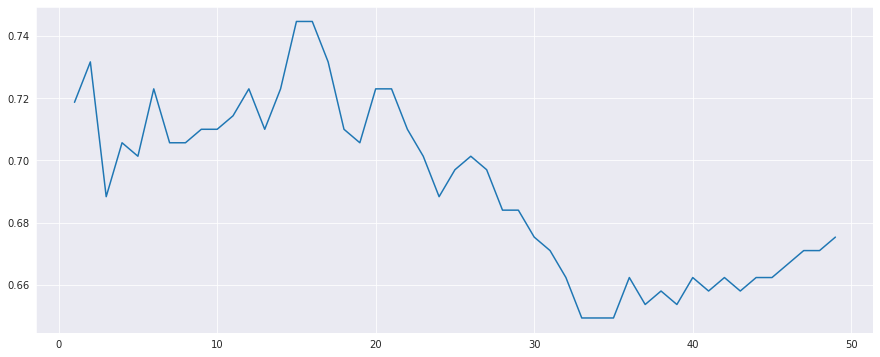

In [34]:
plt.figure(figsize= (15,6))
sns.lineplot(np.arange(1,50),scores)
plt.show()

In [35]:
knn= KNeighborsClassifier(n_neighbors= 15)
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
print(f"accuracy score: ",accuracy_score(y_test,knnpred))

accuracy score:  0.7445887445887446


In [36]:
#classification report
cr= classification_report(y_test,knnpred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       160
           1       0.57      0.65      0.61        71

    accuracy                           0.74       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.75      0.74      0.75       231



# **<h2 style="background-color:DodgerBlue;">LOGISTIC REGRESSION</h2>**

In [37]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lrpred= lr.predict(x_test)
print(f"accuracy score: ",accuracy_score(y_test,lrpred))

accuracy score:  0.7878787878787878


In [38]:
#classification report
cr= classification_report(y_test,lrpred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.65      0.68      0.66        71

    accuracy                           0.79       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.79      0.79      0.79       231



# **<h2 style="background-color:DodgerBlue;">RANDOM FOREST</h2>**

In [39]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred= rf.predict(x_test)
accuracy_score(y_test,rfpred)

0.7705627705627706

In [40]:
#hyperparameter tuning
params={
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

In [41]:
grid_search = GridSearchCV(estimator = rf, param_grid = params,cv = 3)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200]})

In [43]:
grid_search.best_score_

0.7709497206703911

In [44]:
#classification report
cr= classification_report(y_test,rfpred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       160
           1       0.61      0.72      0.66        71

    accuracy                           0.77       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.79      0.77      0.78       231



* # **<h2 style="background-color:DodgerBlue;">AdaBoost</h2>**

In [45]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
adpred= ad.predict(x_test)
accuracy_score(y_test,adpred)

0.7489177489177489

In [46]:
#hyperparameter tuning
params={
   "learning_rate":[0.2,0.1,0.5],
   "n_estimators": [100,150,200]
}

In [47]:
grid_search = GridSearchCV(estimator = ad, param_grid = params,cv = 3)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.1, 0.5],
                         'n_estimators': [100, 150, 200]})

In [49]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [50]:
grid_search.best_score_

0.750465549348231

In [51]:
ad=AdaBoostClassifier(learning_rate= 0.1,n_estimators=100)
ad.fit(x_train,y_train)
adpred= ad.predict(x_test)
print(f"accuracy score: ",accuracy_score(y_test,adpred))

accuracy score:  0.7922077922077922


In [52]:
#classification report
cr= classification_report(y_test,adpred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.66      0.68      0.67        71

    accuracy                           0.79       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231



* # **<h2 style="background-color:DodgerBlue;">GradientBoosting</h2>**

In [53]:
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb= gb.predict(x_test)
accuracy_score(y_test,predgb)

0.7575757575757576

In [54]:
#classification report
cr= classification_report(y_test,predgb)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       160
           1       0.59      0.69      0.64        71

    accuracy                           0.76       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231



In [55]:
from pandas import DataFrame
model=[["KNN",accuracy_score(y_test,knnpred)],["GRADIENTBOOST",accuracy_score(y_test,predgb)],["RANDOMFOREST",accuracy_score(y_test,rfpred)]
       ,["ADABOOST",accuracy_score(y_test,adpred)],["LOGISTICREGRESSION",accuracy_score(y_test,lrpred)]]
dx= DataFrame(model,columns= ["model","score"])

In [56]:
ax= px.bar(dx,x= "model",y="score",template="plotly_dark",title= "scored",color= "model")
ax.show()

The scores and models can be further improved using hyperparameter tuning with different parameters